In [ ]:
import pandas as pd
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\OCR\tesseract.exe'
print(pytesseract.get_tesseract_version())
import easyocr
reader = easyocr.Reader(['en'])
import re
import src.varibles as ivr 


In [2]:
# Load the original CSV file
df = pd.read_csv('splited_dataset/train/part_1.csv').head(40)


In [3]:
# Initialize a list to store ImgDataMngr instances
instances = []

# Iterate through each row in the first 10 rows of the CSV file
for _, row in df.iterrows():
    uid = "example_uid"  # Generate a unique identifier if needed
    img_link = row['image_link']
    group_id = row['group_id']
    entity_name = row['entity_name']
    entity_value = row['entity_value']
    
    # Initialize an ImgDataMngr instance with data from the current row
    img_data_mngr = ivr.ImgDataMngr(
        uid=uid,
        ImgLinks=img_link,          # Single link per instance
        group_ids=group_id,
        entity_names=entity_name,
        entity_values=entity_value,
        DownloadPath="DownloadedImages",
        save_img=True
    )
    
    # Store the instance in the list
    instances.append(img_data_mngr)


Downloaded image 1: DownloadedImages\61I9XdN6OFL-example_uid.jpg
Downloaded image 1: DownloadedImages\71gSRbyXmoL-example_uid.jpg
Downloaded image 1: DownloadedImages\61BZ4zrjZXL-example_uid.jpg
Downloaded image 1: DownloadedImages\612mrlqiI4L-example_uid.jpg
Downloaded image 1: DownloadedImages\617Tl40LOXL-example_uid.jpg
Downloaded image 1: DownloadedImages\61QsBSE7jgL-example_uid.jpg
Downloaded image 1: DownloadedImages\81xsq6vf2qL-example_uid.jpg
Downloaded image 1: DownloadedImages\71DiLRHeZdL-example_uid.jpg
Downloaded image 1: DownloadedImages\91Cma3RzseL-example_uid.jpg
Downloaded image 1: DownloadedImages\71jBLhmTNlL-example_uid.jpg
Downloaded image 1: DownloadedImages\81N73b5khVL-example_uid.jpg
Downloaded image 1: DownloadedImages\61oMj2iXOuL-example_uid.jpg
Downloaded image 1: DownloadedImages\91LPf6OjV9L-example_uid.jpg
Downloaded image 1: DownloadedImages\81fOxWWWKYL-example_uid.jpg
Downloaded image 1: DownloadedImages\81dzao1Ob4L-example_uid.jpg
Downloaded image 1: Downl

In [21]:
print(len(img_data_mngr.preProcessedImages))
print(instances)

1
[<src.varibles.ImgDataMngr object at 0x000001AE0C806D20>, <src.varibles.ImgDataMngr object at 0x000001ADC8F9B9B0>, <src.varibles.ImgDataMngr object at 0x000001AE0C94C980>, <src.varibles.ImgDataMngr object at 0x000001AE0C1F38F0>, <src.varibles.ImgDataMngr object at 0x000001AE0C90F440>, <src.varibles.ImgDataMngr object at 0x000001AE0C12F500>, <src.varibles.ImgDataMngr object at 0x000001ADC8F9BA40>, <src.varibles.ImgDataMngr object at 0x000001AE0B68C140>, <src.varibles.ImgDataMngr object at 0x000001ADC8FF6480>, <src.varibles.ImgDataMngr object at 0x000001AE0C9A2210>, <src.varibles.ImgDataMngr object at 0x000001ADC92C6060>, <src.varibles.ImgDataMngr object at 0x000001ADC92C5E20>, <src.varibles.ImgDataMngr object at 0x000001AE0C7A6600>, <src.varibles.ImgDataMngr object at 0x000001AE0C94C950>, <src.varibles.ImgDataMngr object at 0x000001AE0C9FF830>, <src.varibles.ImgDataMngr object at 0x000001AE0C9FFB90>, <src.varibles.ImgDataMngr object at 0x000001AE0C9FFE90>, <src.varibles.ImgDataMngr ob

In [63]:
instance1 = instances[0]
print(instance1.image_paths)

['DownloadedImages\\61I9XdN6OFL-example_uid.jpg']


DownloadedImages\61I9XdN6OFL-example_uid.jpg


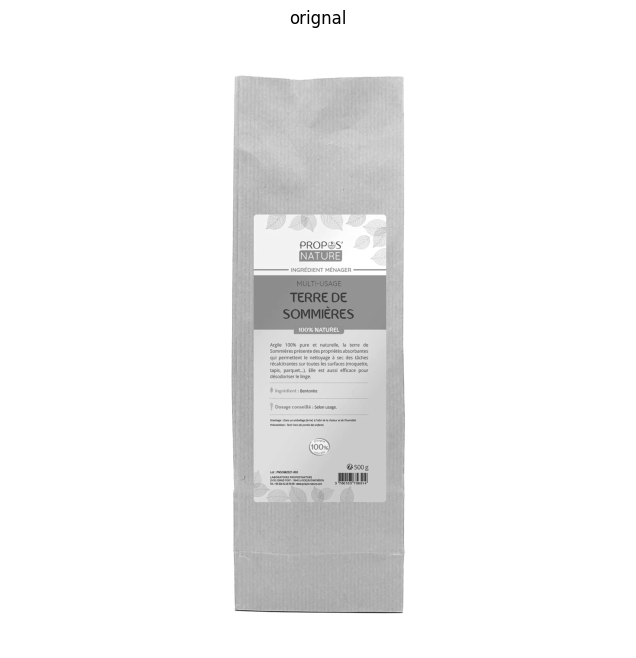

In [74]:
import cv2
import matplotlib.pyplot as plt


pth = instance1.image_paths[0]
print(pth)
image = cv2.imread(pth, cv2.IMREAD_COLOR)
p_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8, 8))
plt.imshow(p_img, cmap='gray')
plt.title('orignal')
plt.axis("off")
plt.show()


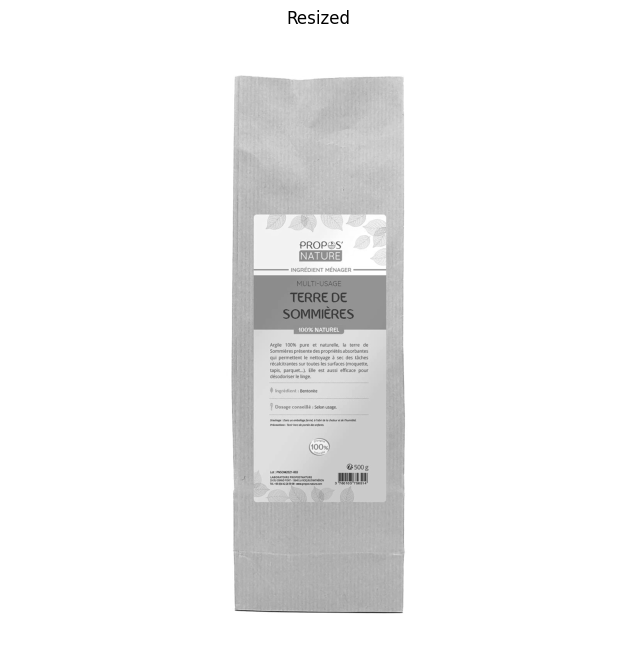

In [75]:
p_proces = ivr.ImgPreprocessor()
p_img_rz = p_proces.resize_image(p_img, show_result=True)

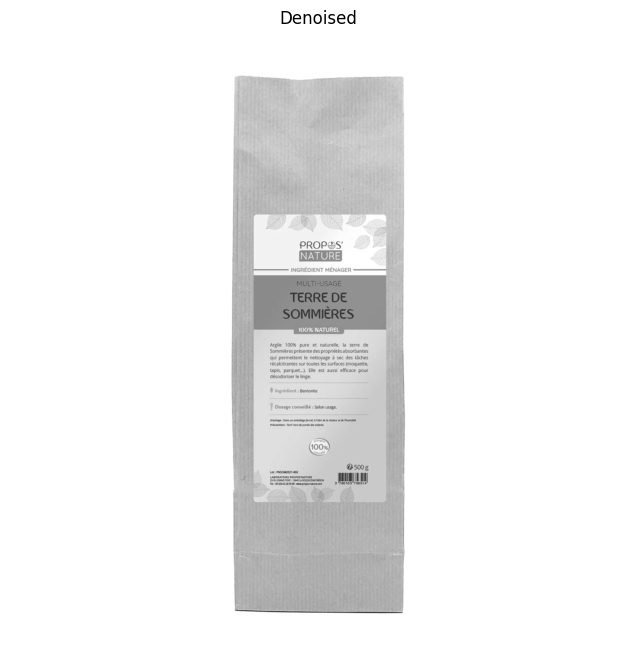

In [76]:
p_img_dn = p_proces.denoise_image(p_img_rz, show_result=True)

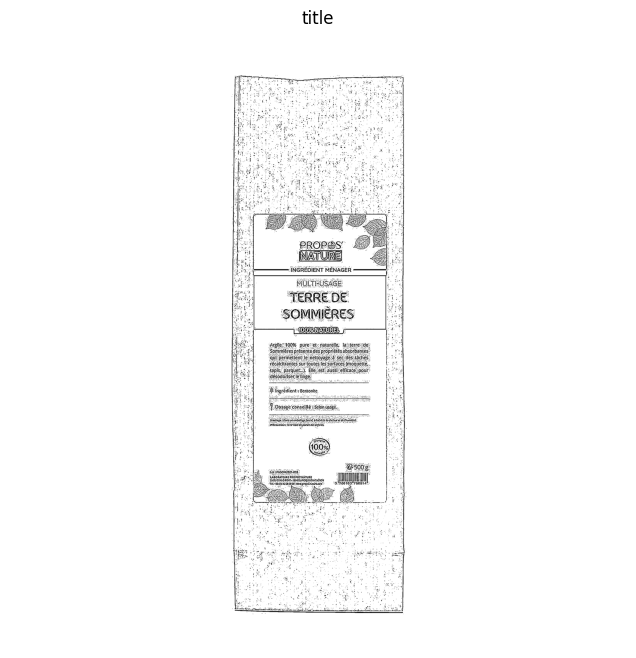

In [77]:
adaptive_thresh = cv2.adaptiveThreshold(p_img_dn, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 7, 2)
plt.figure(figsize=(8, 8))
plt.imshow(adaptive_thresh, cmap='gray')
plt.title('title')
plt.axis("off")
plt.show()


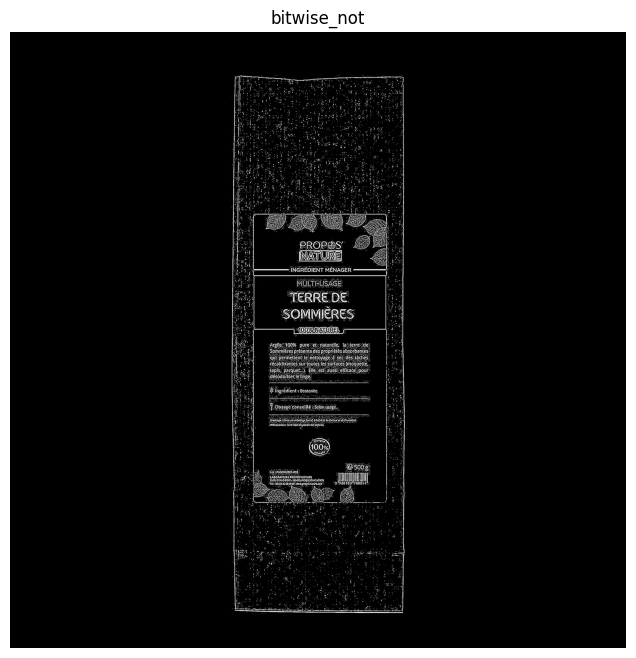

In [78]:
final_img = cv2.bitwise_not(adaptive_thresh)
plt.figure(figsize=(8, 8))
plt.imshow(final_img, cmap='gray')
plt.title('bitwise_not')
plt.axis("off")
plt.show()

In [87]:
import src.single_unit as ut
def ocr(preprocessed_img, ocr_method='e') -> str:
    # Perform OCR on the preprocessed image.
    if ocr_method == 't':
        tes_text = pytesseract.image_to_string(preprocessed_img, lang='eng')
        text = tes_text
    else:
        easy_text = reader.readtext(preprocessed_img, detail=0)
        text = ''.join(easy_text)
    return text

def postprocessing(text: str) -> list:
    # Clean and extract relevant numerical data from OCR text.

    #removing all the spaces /tabs ...
    no_spaces=re.sub(r"\s+", "", text)
    #lowercasing
    lower_case = no_spaces.lower()
    symbols = r'[ !@#%^&*()$_\-\+\{\}\[\]\'\|:;"<>,/~?`=\"©™°®¢»«¥“”§—‘’é€]'
    # pattern = r'(\d+..)'
    pattern = r'(\d+(\.\d{1,})?\w{2})'
    # pattern = r'(\d+(\.\d+)?\w)'
    # pattern = re.compile(r'^-?\d+(\.\d+)?\s+[a-zA-Z\s]+$')
    
    cleaned_symbol = re.sub(symbols, ' ', lower_case)
    cleaned_symbol = cleaned_symbol.replace('"', 'inch')
    cleaned_text = re.findall(pattern, cleaned_symbol) # returns a list of tuples
    cleaned_text = [item for tup in cleaned_text for item in tup] # returns a list of strings
    print('----------------------------------------------------------------------------------------')
    print(f"clr_sym: {cleaned_symbol}")
    print(f"clr_text: {cleaned_text}")
    return cleaned_text

def match_units(input_list, units_dict, entity_name):
    # Match units from input_list using the provided units_dict and entity_name.
    abb_dict = {key: value 
                for category, sub_dict in units_dict.items()
                    if category == entity_name 
                         for key, value in sub_dict.items()}
    
    results = []
    for item in input_list:
        if len(item) > 2:
            last_two_chars = item[-2:]
            result = abb_dict.get(last_two_chars)
            if result:
                results.append(f"{item[:-2]} {result}")
            # else:
            #     last_one_chars = item[-1:]
            #     result = abb_dict.get(last_one_chars)
            #     if result:
            #         results.append(f"{item[:-1]} {result}")
    
    return results

def get_max(units_list):
    if len(units_list) == 0:
        return ""    # print(f"fo: {final_output}")


    max_val = -10000000
    max_val_unit = units_list[0].split(" ")[1]
    for u in units_list:
        parts = u.split(' ')
        num = parts[0]
        if '.' in num:
            num = float(num)
        else:
            num = int(num)

        unit = ' '.join(parts[1:])
        if num > max_val:
            max_val = num
            max_val_unit = unit

    return f'{max_val} {max_val_unit}'


In [90]:
texts = ocr(adaptive_thresh)
cleaned_text = postprocessing(texts)
print(cleaned_text)
matched_units = match_units(cleaned_text, ut.units_dict, instance1.entity_names[0])
print('predicted entity value: ',matched_units)


----------------------------------------------------------------------------------------
clr_sym: propos mtureingredientmenagermultiusagb terrede sommeres 4oopbnaturcl glle 10036pureetzqaturelle  iapterredes sommierespresentedesproprigesabsorbantes quipermettentle asecdesachesrecalcitrantessurtouteslessurfaces oguetteparquer   elleeste7aussl ellicacegpourcpodonsedleingetan08860888060orid08o6to06067077 tingredientvbntonitc   os2gecenseille86selon 74sngewsstogrers64ras86ei08420482743067151ciitoudadjtrcv occrticexissandelnm00 ofvc s00 g lce3p11so1t20z16050eo7itonereorosilatureicugpdtont ixdubonnfdhatrbont  1ud ko rurd5 3448810368514neyovage 
clr_text: ['4oo', '', '10036pu', '', '7au', '', '08860888060or', '', '08o6', '', '06067077', '', '2ge', '', '86se', '', '74sn', '', '64ra', '', '86ei', '', '08420482743067151ci', '', '3p1', '', '1so', '', '1t2', '', '0z1', '', '6050eo', '', '7it', '', '1ud', '', '3448810368514ne', '']
['4oo', '', '10036pu', '', '7au', '', '08860888060or', '', '08o6', 